# Projet de MACS partie 1
## Antoine Habis

# Exercice 1

In [9]:
load('projectData.Rdata')
source('evalTools.R')
source('mesfonctions.r')

## Question 1.a

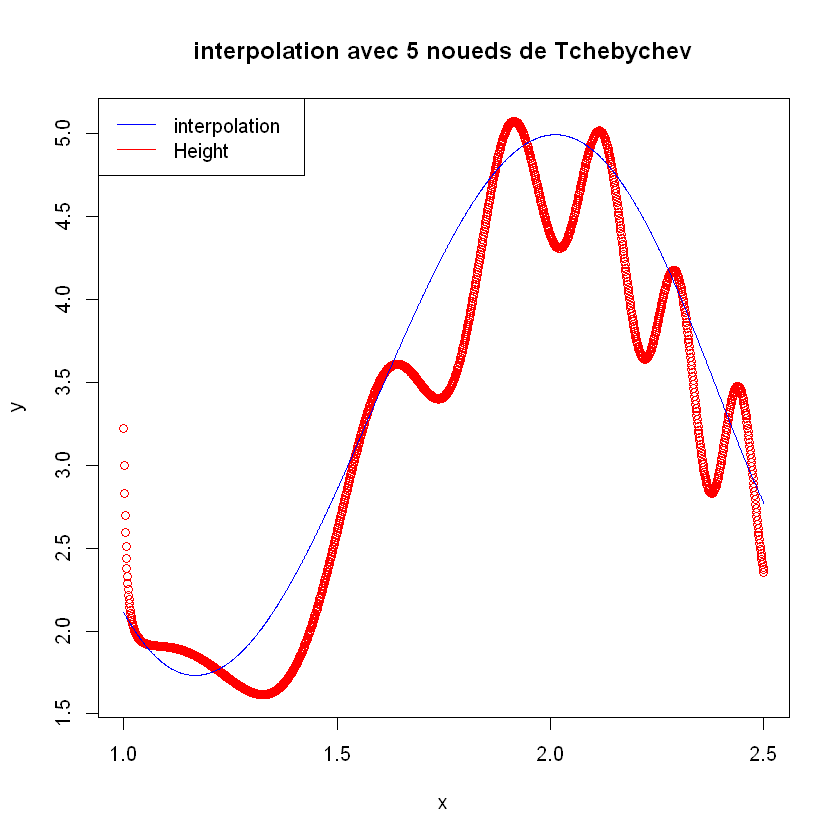

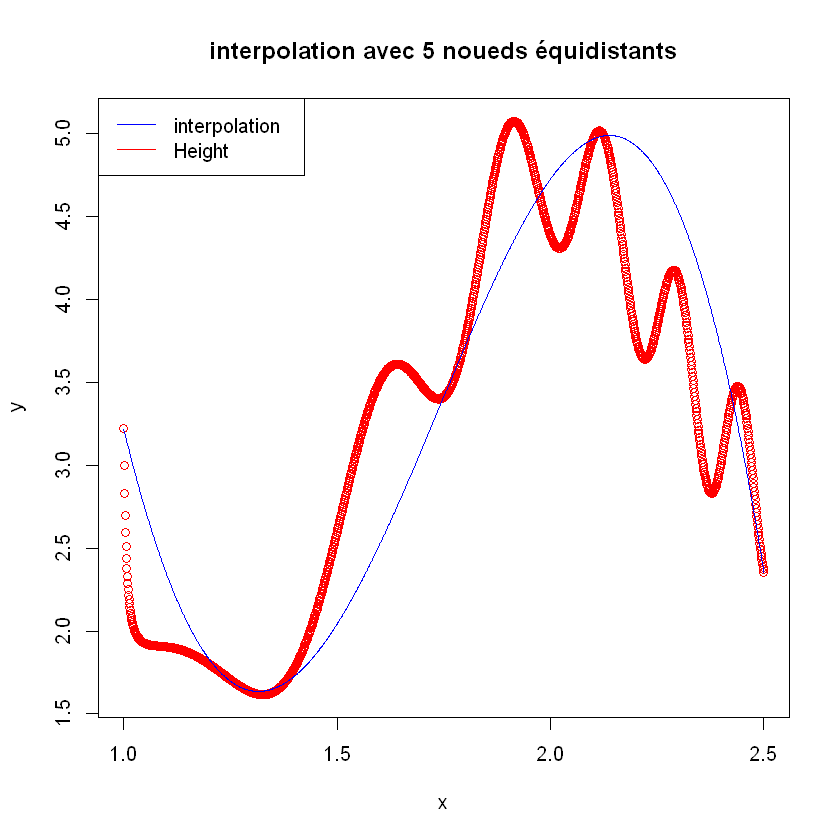

In [2]:
###############################Test 1: 5 noeuds de Tchebychev##################
a=1
b=GRILLE[length(GRILLE)]

Tab_x = eval(rev(noeud_de_tchb(a,b,5)))
Tab_y = evalHeight(Tab_x)
Tab_c = dividif(Tab_x,Tab_y)
Y_interpol = Methode_horner_Newton(Tab_c,Tab_x,GRILLE)
Y = MESURES

plot(GRILLE,Y,xlab="x",ylab="y",col="red")
lines(GRILLE,Y_interpol,col='blue')

legend(x="topleft",c("interpolation","Height"),col=c("blue","red"),lty=c(1,1),bty="x")

title('interpolation avec 5 noueds de Tchebychev')

###############################Test 2: 5 noeuds de équidistants##################


Tab_x=eval(seq(a,b,length.out=5))
Tab_y=evalHeight(Tab_x)
Tab_c=dividif(Tab_x,Tab_y)
Y_interpol=Methode_horner_Newton(Tab_c,Tab_x,GRILLE)
Y=MESURES

plot(GRILLE,Y,xlab="x",ylab="y",col="red")
lines(GRILLE,Y_interpol,col='blue')

legend(x="topleft",c("interpolation","Height"),col=c("blue","red"),lty=c(1,1),bty="x")
title('interpolation avec 5 noueds équidistants')

On se rend bien compte que dans les deux cas, il n y a pas assez de noeuds. L interpolation est donc très approximative,
ce qui explique que la fonction bleue soit parfois très éloignée de la fonction Height.

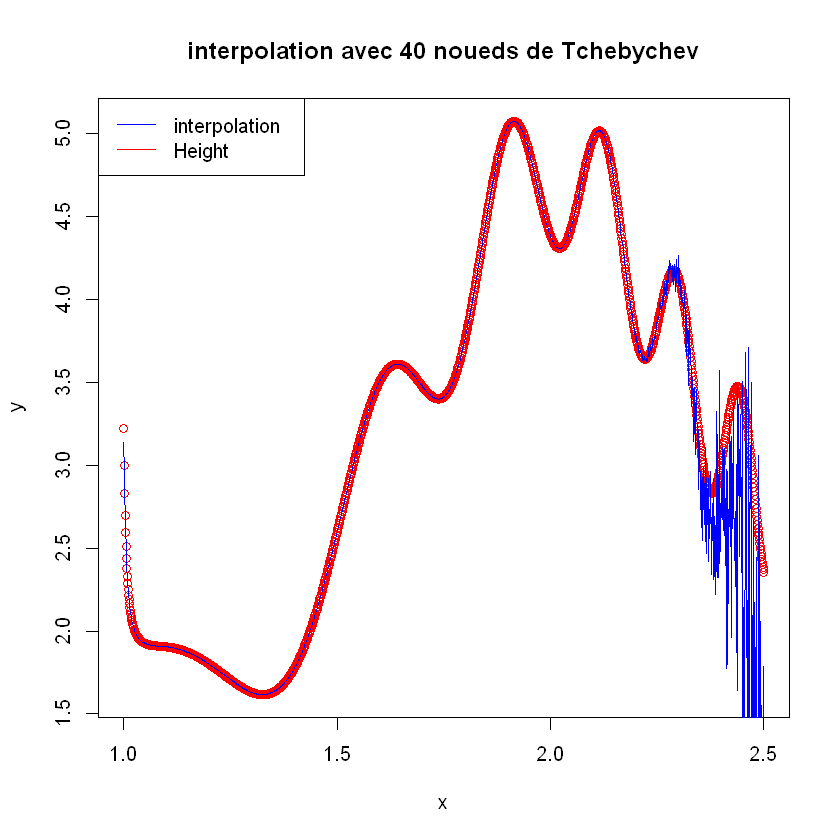

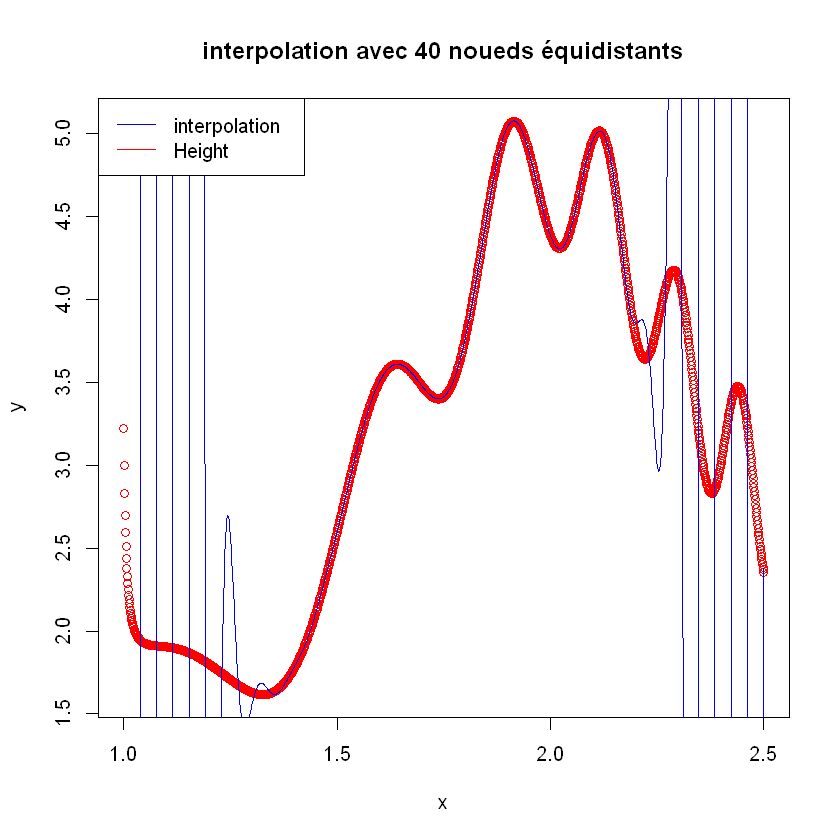

In [265]:
###############################Test 1: 5 noeuds de Tchebychev##################
a = 1
b = GRILLE[length(GRILLE)]

Tab_x = eval(rev(noeud_de_tchb(a,b,40)))
Tab_y = evalHeight(Tab_x)
Tab_c = dividif(Tab_x,Tab_y)
Y_interpol = Methode_horner_Newton(Tab_c,Tab_x,GRILLE)
Y = MESURES

plot(GRILLE,Y,xlab="x",ylab="y",col="red")
lines(GRILLE,Y_interpol,col='blue')

legend(x="topleft",c("interpolation","Height"),col=c("blue","red"),lty=c(1,1),bty="x")

title('interpolation avec 40 noueds de Tchebychev')

###############################Test 2: 5 noeuds de équidistants##################


Tab_x=eval(seq(a,b,length.out=40))
Tab_y=evalHeight(Tab_x)
Tab_c=dividif(Tab_x,Tab_y)
Y_interpol=Methode_horner_Newton(Tab_c,Tab_x,GRILLE)
Y=MESURES

plot(GRILLE,Y,xlab="x",ylab="y",col="red")
lines(GRILLE,Y_interpol,col='blue')

legend(x="topleft",c("interpolation","Height"),col=c("blue","red"),lty=c(1,1),bty="x")
title('interpolation avec 40 noueds équidistants')

Pour 40 noeuds on obtient des resultats très différents:

Pour ce qui est des **noeuds équidistants**, on observe un effet de bords.

Au milieu de l'intervalle d'interpolation la courbe suit bien la fonction Height mais quand on s'éloigne sur les bords, l'interpolation explose.
L'erreur est donc très élevée!!

Pour remédier à ce genre de problème on préfère utiliser les noeuds de Tchebychev. 

Pour ce qui est des **noeuds de Tchebychev**, la courbe suit bien la fonction Height sauf sur la partie de droite. 

L'erreur est néanmoins plus faible que pour les noeuds de Tchebychev.
On approxime mieux avec cette methode


## Question1.b

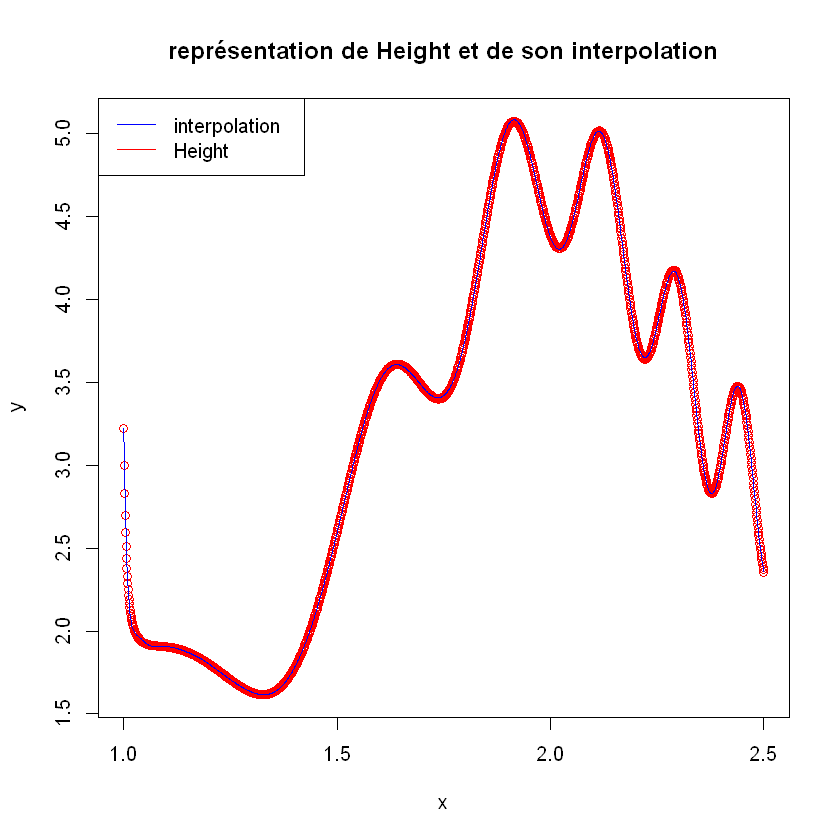

In [289]:
a = 1
b = GRILLE[length(GRILLE)]
Tab_x = sapply(rev(noeud_de_tchb(a,b,27)),FUN=evalX)
Tab_y = sapply(Tab_x,FUN=evalHeight)
Tab_c = dividif(Tab_x,Tab_y)

Y_interpol = Methode_horner_Newton(Tab_c,Tab_x,GRILLE)
Y = MESURES;

plot(GRILLE,Y,xlab="x",ylab="y",col="red")
title('représentation de Height et de son interpolation')
legend(x="topleft",c("interpolation","Height"),col=c("blue","red"),lty=c(1,1),bty="x")
lines(GRILLE,Y_interpol,col='blue')

Ici l'interpolation semble presque pafaite la courbe suit bien la fonction Height

## Question 1.c

In [12]:
a=GRILLE[1]
b=GRILLE[length(GRILLE)]


In [13]:
paste("Le degrès du polynome qui minimise l erreur  est ",toString(minimiser_erreur(40,"cheby")))

[1] "Le degrès du polynome qui minimise l erreur  est  36"

In [11]:
paste("Le degrès du polynome qui minimise l erreur  est ",toString(minimiser_erreur(40,"equi")))

[1] "Le degrès du polynome qui minimise l erreur  est  3"

Ce qui est important de constater ici, c est qu'on parle de norme infinie soit le max des erreurs locales.

Quand on fait une **interpolation avec des noeuds equidistants** on observe très vite un effet de bord lorsque l'on augmente le nombre de points sur lequel on interpole.
Cet **effet de bord** fait apparaitre des erreurs locales très grandes ce qui explique que le degrès optimal du polynome d'interpolation soit si faible.


Pour ce qui est de **l'interpolation avec des noeuds de Tchebychev**, on observe pas des effets de bord. Lorsque l'on augmente le nombre de noeuds l'erreur baisse en moyenne jusqu'à ce qu'on attigne un seuil où l'erreur réaugmente à cause du nombre de noeuds trop important.

## Question 2.a

[1] 0.03507921

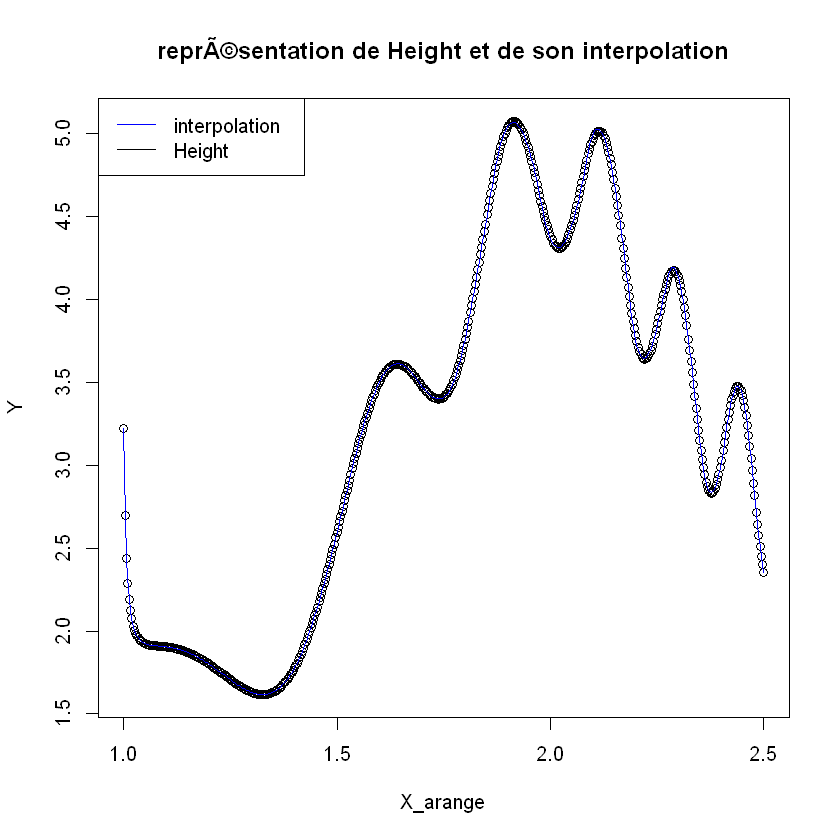

In [14]:
interpolation_morceau(4,20,"cheby",TRUE)

## Question 2.b

p correspond aux nombres de points dans les intervalles et n correspond aux nombres d'intervalles.

On a donc un nombre de point limité: $p\times n-n+1=80$.
Nous allons essayer de trouver les paramètres optimum en changeant p et n.

Pour cela il suffit de regarder toutes les valeurs que peuvent prendre p et n pour un nombre de points $l$ donné compris entre 1 et 80.


Ce sont les diviseurs de l

Pour chaque l on introduit donc une liste L qui contient les diviseurs de l


In [15]:
Lmin = 10**7
a = GRILLE[1]
b = 2.5
for (m in (2:80)){
    L = diviseur(m)
    if(length(L)!=2){
    #On enlève le cas où le couple (n,p) vaut (1,80) ou (80,1) qui ne correpond pas à une interpolation par morceau.
    j = length(L)-1
    k1 = c()
    for (i in (2:j)){
        k1 = c(k1,interpolation_morceau(L[i],L[j - i + 2],type="cheby"))}
    if (min(k1) < Lmin){
    Lmin = min(k1)
    p = L[which(k1 == min(k1)) + 1]
    n = L[j-which(k1 == min(k1)) + 1]
    }
}
}

paste('Pour ce qui est de noeuds de Tchebychev:')
paste('p correspond aux nombres de points dans les intervalles et n correspond aux nombres d  intervalles')
paste('les meilleurs paramètres sont: p=',toString(p))
paste('et n=',toString(n))

paste('l erreur associée est Err= ',toString(interpolation_morceau(p,n,type="cheby")))





[1] "Pour ce qui est de noeuds de Tchebychev:"

[1] "p correspond aux nombres de points dans les intervalles et n correspond aux nombres d  intervalles"

[1] "les meilleurs paramètres sont: p= 4"

[1] "et n= 20"

[1] "l erreur associée est Err=  0.0350792128906314"

In [302]:
Lmin=10**7
a=GRILLE[1]
b=2.5
for (m in (2:80)){
    L = diviseur(m)
    if(length(L) != 2){
    #On enlève le cas où le couple (n,p) vaut (1,80) ou (80,1) qui ne correpond pas à une interpolation par morceau.
    j = length(L)-1
    k1 = c()
    for (i in (2:j)){
        k1 = c(k1,interpolation_morceau(L[i],L[j-i+2],type="equi"))}
    if (min(k1)<Lmin){
    Lmin = min(k1)
    p = L[which(k1 == min(k1))+1]
    n = L[j-which(k1 == min(k1))+1]
    }
}
}

paste('Pour ce qui est des noeuds equidistants:')
paste('p correspond aux nombres de points dans les intervalles et n correspond aux nombres d  intervalles')
paste('les meilleurs paramètres sont: p=',toString(p))
paste('et n=',toString(n))
paste('l erreur associée est Err= ',toString(interpolation_morceau(p,n,type="equi")))





[1] "Pour ce qui est des noeuds equidistants:"

[1] "p correspond aux nombres de points dans les intervalles et n correspond aux nombres d  intervalles"

[1] "les meilleurs paramètres sont: p= 20"

[1] "et n= 4"

[1] "l erreur associée est Err=  0.115039868600276"

Le resultat optimal est donc obtenu en utilisant les 80 points: 20 intervalles contenant chacuns 4 points.
Comme on peut le remarquer ici, l'erreur est plus faible avec des noeuds de Tchebychev. 

On aurait pu peut être prévoir un tel résultat car la constante de lebesgue contrôlant l'erreur et la stabilité $\Lambda_n^{Tcheby}<<\Lambda_n^{equi}$
